# PRÁCTICA 5 - Selección y Extracción de características

Notebook diseñado por Inmaculada Mora.

Fecha de entrega: 12 de enero de 2021 (23.59h), a través de Aula Virtual.

Esta práctica consta de tres bloques:

- Generación de características 
De manera artificial, se generarán características irrelevantes y redundantes

- Aplicación de técnicas de selección de características. También se le conoce en la literatura como selección de variables o selección de atributos.
Consideraremos esquemas filter, wrapper y embedded

- Diseño de clasificador k-nn con las características seleccionadas

- Aplicación de PCA como técnica de extracción de características

Las indicaciones del material a entregar aparecen identificadas en varios puntos del notebook con la palabra "Entrega". Se puede tratar: 
- de código, que debe incluir en una celda concreta;
- de cuestiones teórico prácticas,a  las que debe responder también en una celda concreta del notebook



In [1]:
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

# Entrega. Discusión previa

**Explique, con sus propias palabras, qué entiende por reducción de la dimensionalidad en el contexto de aprendizaje automático.**

La reducción de la dimensionalidad consiste en obtener un mismo conjunto de observaciones con una disminución del número de características del conjunto de datos, mediante la obtención de un conjunto de características principales. Esto reduce el coste computacional asociado al diseño del modelo.   


**Explique, con sus propias palabras, qué entiende por: (1) selección de características (también denominado feature selection o FS); (2) transformación de características (también denominado feature transformation); (3) cómo se relacionan (1) y (2) con la reducción de dimensionalidad.**

- La selección de características se entiende como una disminución del número de éstas, en función de un criterio elegido por el usuario, escogiendo aquellas que se consideran más informativas, eliminando aquellas que son   irrelevantes, redundantes o altamente correlacionadas. Este proceso mantiene las características originales.


- La transformación de características consiste en cambiar el espacio de características originales a otro espacio con distinta dimensión, es decir, esta transformación crea una función lineal o no lineal formada por las carcaterísticas iniciales. A diferencia del anterior proceso, éste genera nuevas características. 


- Ambos procesos implican reducción de dimensionalidad ya que se está modificando el espacio de características.



**Discuta sobre la idoneidad o no de aplicar técnicas de FS cuando hay pocas o muchas características- ¿Cuándo es necesario hacer FS? cuando hay pocas, cuando hay muchas características? ¿en cualquiera de los dos casos? ¿por qué?**

La idoneidad de aplicar o no técnicas de FS depende de diversos factores. 

En primer lugar, la selección de características se considera un procedimiento aconsejable antes de etrenar cualquier modelo, especialmente cuando se tiene un conjunto de datos con muchas características. Esto es debido a que si el número de observaciones no es muy grande y la dimensionalidad del espacio de características es grande, el espacio de características estaría muy disperso, lo cual conduciría a una maldición de dimensionalidad, debido a esta escasez de muestras.

Por otra parte, este proceso es efectivo cuando el conjunto de datos presenta de características redundantes, aportan la misma información, e irrelevantes, sin relación con la variable a predecir. No obstante, cuando el conjunto de datos presenta características relevantes para el problema, si se aplicara la FS se podrían eliminar características que, aunque fueran menos relevantes, siguírían aportando información en la predicción, pudiendo aportar peores resultados. 

Por último, FS dependería de la tarea y la carga computacional ya que cuantas más características se tengan, mayor lentitud en el entrenamiento del modelo. Si se aplica una selección de características para disminuir la carga computacional puede dar el caso de que se obtengan peores resultados. Por ello, es importante tener en cuenta un compromiso entre lentitud y mejores resultados. 


**Explique cómo generaría dos características irrelevantes que tengan distinta estadística. Justifique por qué son características irrelevantes**

Se genera una variable aleatoria uniforme que no guarda ninguna relación con la característica de salida y una constante como nuevas características para el conjunto de observaciones previo.
Estas nuevas variables se consideran irrelevantes ya que no tienen ninguna relación con la variable de salida.  


**Explique cómo generaría dos características características redundantes. Justifique por qué son características redundantes**

Se genera una variable a partir de una combinación lineal de alguna de las características originales y otra variable mediante la multiplicación por un escalar a alguna de las características iniciales, por ejemplo el doble de la variable Glucosa. Estas nuevas variables se consideran redundantes porque no aportan información adicional y  son correlativas a alguna/s de las características presentes, añadiendo ruido. 


# 1. Cargar fichero de observaciones. Generación de nuevas características

Continuaremos trabajando en esta práctica con el fichero 'pima_indian_diabetes.csv' con el objetivo de abordar una tarea de clasificación. 


In [2]:
# Leemos lel fichero y extraemos las variables de interés
pima_indians_df = pd.read_csv('pima_indias_prepro.csv')     # base de datos preprocesada

# comprobamos que lo hemos cargado adecuadamente
pima_indians_df.head()
Index_columns = pima_indians_df.columns[0:8]
print(Index_columns) 



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


# Entrega
Como hay valores perdidos, trabajamos directamente con la versión pre-procesada de los datos. 

Cada estudiante debe cargar su base de datos preprocesada y realizar la práctica considerando esa base de datos a partir de este punto.




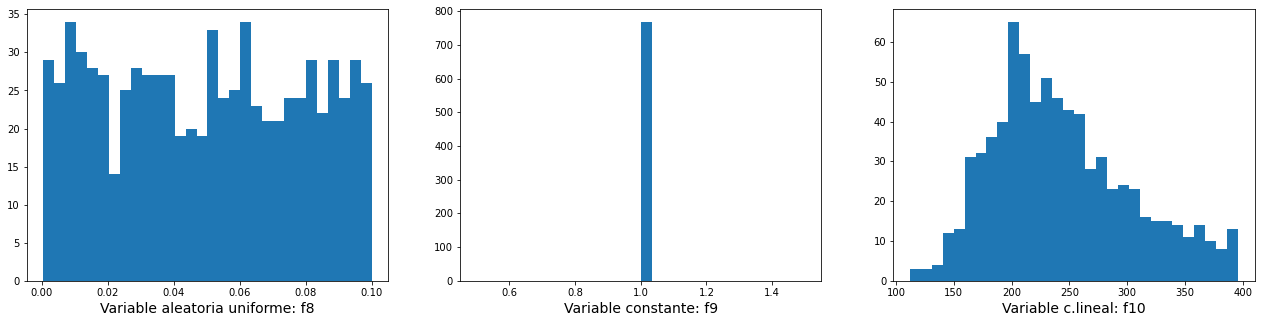

In [3]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
array = pima_indians_df.values

# Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
X = array[:,0:8]
Y = array[:,8]



# Generamos nuevas características

# Valores de una v.a uniforme, incorrelada con el resto
Vble_uniforme = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 1))


# Valores de una constante
Vble_cte = np.ones((X.shape[0],1))


# Valores con el doble de una característica (p.e., la segunda - Glucosa). 
# Cada estudiante puede elegir una combinación lineal diferente, y también una característica diferente
Vble_doble = 2*X[:,1][:, np.newaxis]



# Añadimos 3 columnas a la base de datos original. Cada columna corresponderá a una nueva variable.
# Recordamos el orden en el que se consideran las nuevas variables
X = np.hstack((X, Vble_uniforme))  # f8
X = np.hstack((X, Vble_cte))       # f9
X = np.hstack((X, Vble_doble))     # f10


# para no arrastrar nombres largos, consideramos los siguientes nombres de las variables
names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']


plt.figure(figsize=(22,5))

plt.subplot(1,3,1)
plt.hist(Vble_uniforme,bins=30)
plt.xlabel('Variable aleatoria uniforme: f8',fontsize=14)

plt.subplot(1,3,2)
plt.hist(Vble_cte,bins=30)
plt.xlabel('Variable constante: f9',fontsize=14)

plt.subplot(1,3,3)
plt.hist(Vble_doble,30)
plt.xlabel('Variable c.lineal: f10',fontsize=14)  

plt.show()



# 2. Selección de características. Métodos filter

Entrega: 

- **Explique, desde el punto de vista del aprendizaje automático, la principal diferencia entre métodos filter y métodos wrapper y embedded**

    El método filter considera el proceso de selección de características independiente del algoritmo de machine learning, por tanto solo tiene en cuenta los rasgos intrínsecos de los datos. En cambio, en el método wrapper selecciona características en función de la capacidad predictiva del algoritmo, es decir, se van seleccionando características y obteniendo scores para cada subconjunto, posteriormente se elige aquel conjunto que mejor score obtenga. Por otra parte, en el método embedded la selección de características se realiza durante el aprendizaje del modelo. 


Como sabe, para realizar la selección de variables, los métodos filter hacen uso de un criterio de evaluación de la adecuación de una característica y de un ordenamiento (ranking) de ese criterio. 


- **Explique razonadamente si el ordenamiento de las características se realiza antes o después de realizar la tarea de clasificación.** 

    El ordenamiento de las características depende del métodos de selección de características utilizado. En el caso de un método filter se realiza antes de realizar la tarea de clasificación ya que se seleccionan las características antes del diseño del modelo. En cambio, tanto en el método wrapper como en el embebbed el ordenamiento de las características se realiza durante la tarea de clasificación.


Entre los criterios para evaluar la adecuación de características se encuentran: la identificación de constantes, la correlación de las características con la variable de salida, la correlación de las características con la variables entre si y la informacion mutua de las variables con la objetivo. 


In [4]:
# 2.1. Identificamos variables constantes y las eliminamos para reducir la dimensionalidad
from sklearn.feature_selection import  VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]




# Eliminar columnas con valores constantes (umbral de varianza 0)
pd_extendido = pd.DataFrame(X, columns=names)
print(pd_extendido.shape)

pd_extendido_VarThSel = variance_threshold_selector(pd_extendido, 0)
print(pd_extendido_VarThSel.shape)


(768, 11)
(768, 10)


In [5]:
pd_extendido.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10'], dtype='object')

In [6]:
pd_extendido_VarThSel.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f10'], dtype='object')

**Entrega: Explique qué variable(s) se han eliminado, y qué ha ocurrido con las variables que estaban localizadas en las columnas posteriores. ¿Qué identificadores de names han desaparecido** 


Se ha elimando la variable f9 que corresponde con la variable constante para cada observación ya que presenta una varianza igual a cero, que es menor al umbral considerado en la función *variance_threshold_selector*. El resto de variables localizadas en las columnas posteriores se mantienen pues cumplen la condición de varianza mínima. 


<AxesSubplot:>

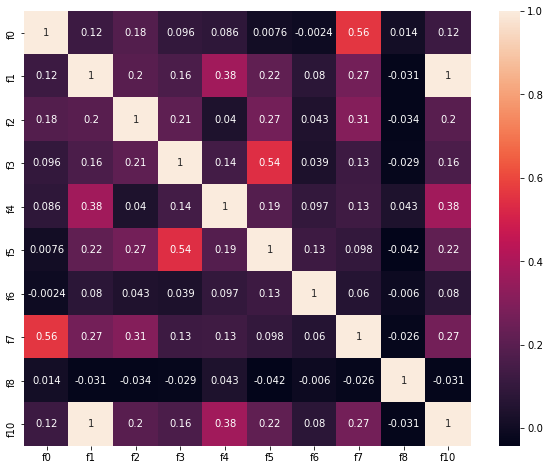

In [7]:
# 2.2. Obtenemos los coeficientes de correlación entre cada par de variables 
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = pd_extendido_VarThSel.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Entrega. Comente los valores obtenidos en la matriz de correlación e identifique pares de variables con alta correlación, sea positiva o negativa**

A partir de este método se puede observar la correlación entre las diferentes variables de entrada y de esta forma eliminar aquellas que presentan una alta correlación, ya que estarían ofreciendo la misma información y por tanto serían redundantes. 

Se consideran pares de variables con alta correlación, sea positiva o negativa, cuando el valor de correlación es mayor o igual a 0.8 en valor absoluto. 

En general, entre las distintas variables existe una pequeña correlación. La correlación entre una variable consigo misma es igual a 1, lo cual tiene sentido, ya que ofrecen exactamente la misma información. Por otro lado, el único par de variables que supera 0.8 son la f1 y f10, con una correlación de 1. Esto se debe a que la variable f10 aporta la misma información que la variable f1 pues la variable f10 se ha construido a partir del doble de la variable f1.  



<AxesSubplot:>

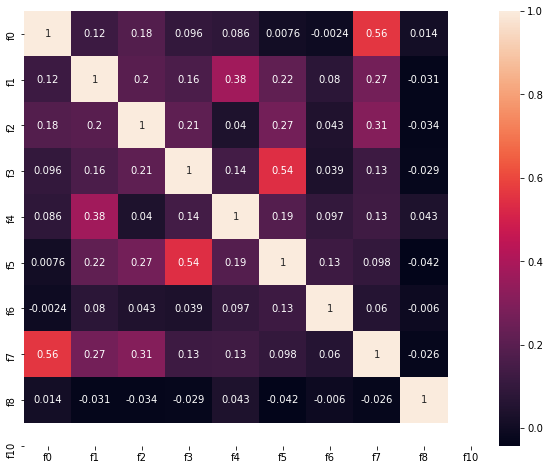

In [8]:
# nuevo array de variables, manteniendo los nombres de names 
X_extend = pd_extendido_VarThSel.values


# eliminamos f10, que se encuentra en la posición 9
X_extend_2 = np.delete(X_extend, 9, axis=1)
names_extend_2 = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']

f, ax = plt.subplots(figsize=(10, 8))
pd_extendido_2 = pd.DataFrame(X_extend_2, columns=names_extend_2)

# comprobamos que, efectivamente, hemos eliminado una de las variables con mayor correlación
sns.heatmap(pd_extendido_2.corr(),annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Hasta este momento, hemos quitado características con varianza nula (constantes) y características muy correladas con otras. 
# Queda todavía la característica aleatoria (f8)



In [9]:
# 2.3. Calculamos, como medida para evaluar la adecuación de cada característica, dos figuras de mérito adecuadas en tareas de clasificación (métodos filter):
# 2.3.1. El estadístico chi cuadrado (sólo sirve si la característica tiene valores no negativos)
# 2.3.2. La información mútua

# Importamos las bibliotecas necesarias 
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Scikit-learn proporciona la clase SelectKBest, que al usarse en combinación con distintos tests estadísticos, permite seleccionar una serie de características


# como tenemos 9 características, evaluamos el estadístico chi2 para las 9, y posteriormente ordenamos los valores
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X_extend_2, Y)
print(fit.scores_)

[8.09830075e+01 1.37809723e+03 3.26975202e+01 7.53985822e+01
 6.84623988e+02 8.56098318e+01 3.76666165e+00 2.35449513e+02
 6.93104567e-02]


Cuanto más grande es el valor, más relevante es la característica

Text(0.5, 1.0, 'Estadístico chi cuadrado y todas las observaciones')

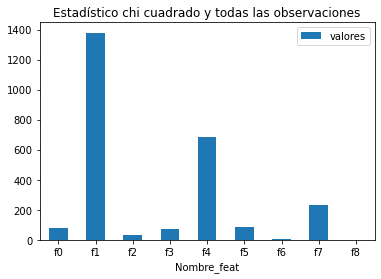

In [10]:
# gráfico de barras utilizando matplotlib

df = pd.DataFrame({'Nombre_feat':pd_extendido_2.columns, 'valores':fit.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado y todas las observaciones")



La característica más relevante según este estadístico es Glucosa

Text(0.5, 1.0, 'Ordenamiento de características con el estadístico chi cuadrado y todas las observaciones')

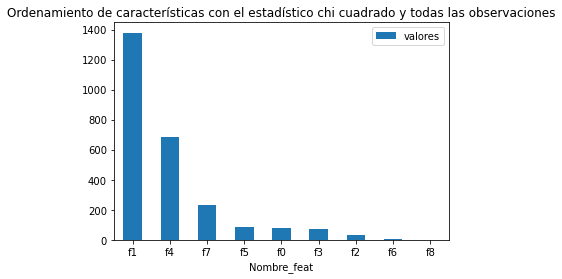

In [11]:
# ordenamos en sentido descendente (de mayor a menor), y lo representamos
df_ordenado = df.sort_values('valores', ascending=False)
ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Ordenamiento de características con el estadístico chi cuadrado y todas las observaciones")

In [12]:
# Pero ... para realizar la selección de características, debería realizarse considerando el conjunto de entrenamiento (sin tener en cuenta el conjunto de test)
X_train, X_test, Y_train, Y_test = train_test_split(X_extend_2, Y, stratify=Y, random_state=2, test_size = 0.2)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_extend_2, Y, random_state=2, test_size = 0.2)


**Entrega. Explique el significado de la opción "stratify" en la función anterior. Implemente y muestre las representaciones gráficas que considere oportunas para una mejor explicación del significado de esta opción**


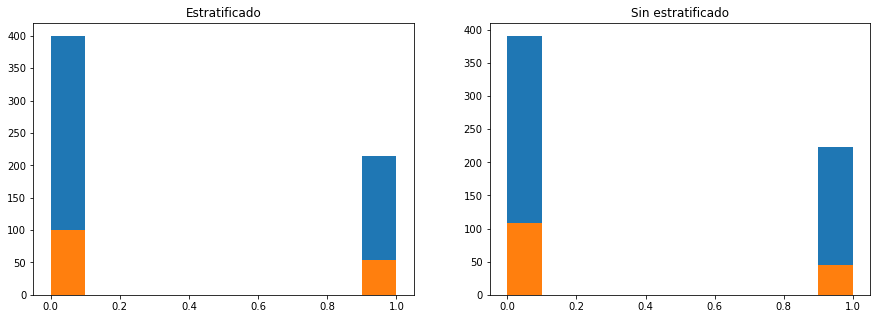

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Estratificado")
plt.hist(Y_train);
plt.hist(Y_test);

plt.subplot(1,2,2)
plt.title("Sin estratificado")
plt.hist(Y_train1);
plt.hist(Y_test1);

In [14]:
print("Y_train-Estratificado",np.unique(Y_train, return_counts=True)[1])
print("Y_test-Estratificado",np.unique(Y_test, return_counts=True)[1])

print("Y_train-Sin estratificado",np.unique(Y_train1, return_counts=True)[1])
print("Y_test-Sin estratificado",np.unique(Y_test1, return_counts=True)[1])


Y_train-Estratificado [400 214]
Y_test-Estratificado [100  54]
Y_train-Sin estratificado [391 223]
Y_test-Sin estratificado [109  45]


El parámetro *stratify* realiza una partición de tal forma que la proporción de observaciones de cada clase en el conjunto de test y en el conjunto de diseño es la misma. Esto se puede observar en el gráfico de la izquierda (estratificado), en el que hay un 65% de 0 y un 35% de 1, aproximádamente, tanto en el conjunto de diseño (azul) como en el de test (naranja). En cambio, en el gráfico de la derecha (sin estratificar) hay un 63% de 0 en el conjunto de diseño y un 70% en el conjunto de test, lo mismo ocurre con la clase 1 con un 37% en diseño y un 30% en test, teniendo distintas proporciones en el conjunto de test y entrenamiento. 


#  2.3.1. Selección de características con el estadístico chi-cuadrado

Text(0.5, 1.0, 'Estadístico chi cuadrado y el conjunto de train')

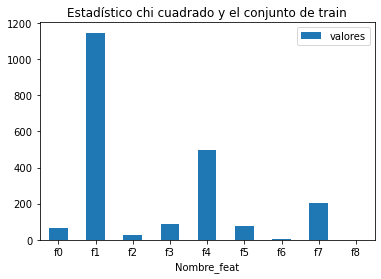

In [15]:

bestfeatures_Chi2 = SelectKBest(score_func=chi2, k=9)
fit_Chi2 = bestfeatures_Chi2.fit(X_train, Y_train)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':pd_extendido_2.columns, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Estadístico chi cuadrado y el conjunto de train")

Text(0.5, 1.0, 'Ordenamiento de características con el estadístico chi cuadrado y el conjunto de train')

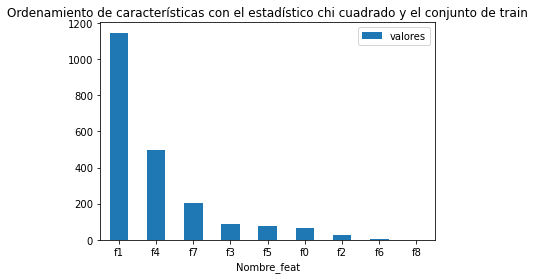

In [16]:
# ordenamos en sentido descendente (de mayor a menor), y lo representamos
df_ordenado = df.sort_values('valores', ascending=False)
ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Ordenamiento de características con el estadístico chi cuadrado y el conjunto de train")

# Entrega

**Indique y justifique razonadamente qué características elegiría considerando el estadístico chi-cuadradado. ¿Qué característica es la última que aparece en el ordenamiento? ¿por qué cree que sucede esto?**

El estadístico chi-cuadradado es una medida de relaciones lineales entre cada característica y la de salida. 

Considerando el estadístico chi-cuadradado se elegirían las características f1, f4 y f7 ya que son las variables con mayor valor numérico y por tanto son las que más información comparten con la variable de salida, en este caso Outcome.

El resto de variables no serían elegidas porque al tener un valor bajo, no comparten tanta información con la variable de salida. Además, se observa que a partir de la característica f3 hay una mínima variabilidad. 

La última característica es la f8 que coincide con la variable irrelevante añadida al principio de la práctica. Ésta es una variable aleatoria uniforme que no comparte ninguna relación lineal con la variable de salida y es por ello que presenta un valor nulo en la representación del estadístico chi cuadrado. 


**Discuta sobre los valores y ordenamiento de características si no hubiera eliminado las características anteriores.**

Si no se hubieran eliminado las características anteriores, la variable f9, la constante, se posicionaría en las últimas posiciones, compartiendo el mismo valor que la variable f8, debido a que tampoco comparte ninguna relación lineal con la variable de salida. Por otro lado, la variable f10 (combinación lineal) se posicionaría al lado de la variable f1 (Glucosa) debido a que es el doble de dicha variable, ofreciendo la misma información.


#  2.3.2. Selección de características con el criterio de información mútua

Text(0.5, 1.0, 'Información Mútua considerando subconjunto de X train')

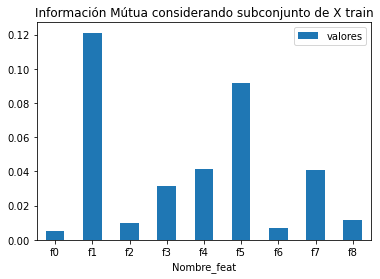

In [17]:
# Selección según información mútua, tras haber eliminado las variables constantes y las que están altamente correladas entre sí
# Consideramos las mismas características (en X_train) que con el estadístico chi cuadrado

# Selección de k características con Información Mútua
valores = mutual_info_classif(X_train, Y_train,random_state=0)
df = pd.DataFrame({'Nombre_feat':pd_extendido_2.columns, 'valores':valores})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Información Mútua considerando subconjunto de X train")

Text(0.5, 1.0, 'Ordenamiento de características con Información Mútua considerando subconjunto de X train')

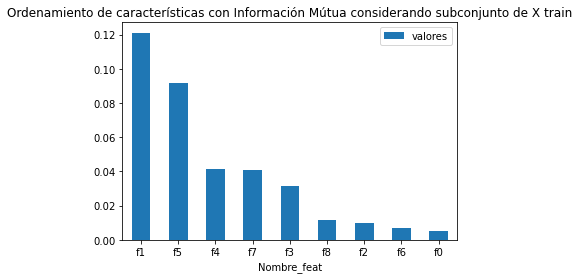

In [18]:
# ordenamos en sentido descendente (de mayor a menor), y lo representamos
df_ordenado = df.sort_values('valores', ascending=False)
ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
plt.title("Ordenamiento de características con Información Mútua considerando subconjunto de X train")


Se les puede preguntar que por qué salen distintos, y que diseñen por ejemplo un esquema k-nn e indiquen, si tuvieran que elegir 3 características, con cuál de las tres se quedarían, si con las de chi-cuadrado o con las de Información Mútua

# Entrega

**Indique y justifique razonadamente qué características elegiría considerando el criterio de información mútua. ¿Qué característica es la última que aparece en el ordenamiento? ¿por qué cree que sucede esto?**

El criterio de información mútua mide relaciones no lineales entre cada característica y la variable de salida. 

Considerando el criterio de información mútua se elegirían las características f1, f5, f4, f7 y f3 ya que son las variables con mayor valor numérico y por tanto las que más información comparten con la variable de salida, en este caso Outcome.

La última característica que aparece en el ordenamiento es la variable f0. Esto se debe a que esta característica es la que menor relación no lineal presenta con la variable de salida. 

Cabría esperar que la última característica fuera f8 ya que se ha añadido como característica irrelevante. Sin embargo, la información mutua guarda relación con el tipo de distribución que sigue la variable, por lo que cuanto más uniforme sea una variable, más informativa y en este caso f8 es uniforme y no se encuentra en la última posición. A su vez, esto también puede verse afectado por el algoritmo de información mutua que se ha utilizado, pues en este caso trabaja con probabilidades. 


**Discuta sobre los valores y ordenamiento de características si no hubiera eliminado las características anteriores.**

Si no se hubieran eliminado las características anteriores, la variable f9, la constante, se posicionaría en las últimas posiciones, cerca de la variable f8, pero no necesariamente compartiendo el mismo valor. Por otro lado, la variable f10 (combinación lineal) se posicionaría al lado de la variable f1 (Glucosa) debido a que es el doble de dicha variable, ofreciendo la misma información.


# 3. Diseño de clasificador k-nn

# Entrega: 

**Diseñe el mejor clasificador k-nn que haga uso de todas las características del primer apartado de esta práctica (8 características originales + 3 características generadas). Compare los resultados con los obtenidos en la práctica del Tema 3, justificando los resultados (tanto en el valor de k elegido como en las medidas de prestaciones)**



In [19]:
# Aplicaremos el clasificador k-nn sobre subconjuntos de características
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(pd_extendido, Y, stratify=Y, random_state=2, test_size = 0.2)


# Normalizamos cada característica
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)



In [20]:
X_train_norm.shape

(614, 11)

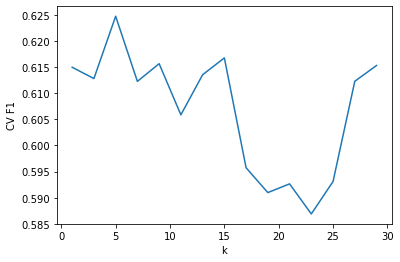

El valor de k más adecuado es 5
F1: 0.6247387116422223


In [21]:
from sklearn.neighbors import KNeighborsClassifier

k_values=range(1,31,2)
cv_k_scores=[]

for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k) #clasificador knn
    scores= cross_val_score(kNN, X_train_norm, Y_train, cv=3, scoring='f1') 
    #calcula el accuracy con el clasificador knn en train y 3 folds
    cv_k_scores.append(scores.mean()) #almacena la media de los scores
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV F1')
plt.show()

# Seleccionamos el máximo valor porque estamos considerando entropía
print("El valor de k más adecuado es",np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
print("F1:", max(cv_k_scores))

Se opta por F1 como medida de evaluación en el conjunto de validación debido a que se tiene una base de datos desbalanceada y F1 tiene en cuenta tanto los falsos positivos como los falsos negativos.

El valor de k vecinos más próximos es 5 pues el valor que consigue obtener mejor F1. Este valor es diferente al obtenido en la práctica 3 debido a la incorporación de nuevas variables de entrada. 

In [22]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, confusion_matrix

kNN_norm = KNeighborsClassifier(n_neighbors = 5)
kNN_norm.fit(X_train_norm, Y_train)

y_pred1 = kNN_norm.predict(X_test_norm)

print('Accuracy:', accuracy_score(Y_test, y_pred1))
print('Sensibility:',recall_score(Y_test, y_pred1))
print("Confusión matrix: ")
print(confusion_matrix(Y_test, y_pred1))
print("Precision:", precision_score(Y_test, y_pred1))

Accuracy: 0.7207792207792207
Sensibility: 0.46296296296296297
Confusión matrix: 
[[86 14]
 [29 25]]
Precision: 0.6410256410256411


In [23]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibility",'Precision'],                             ####################
                      "kNN Práctica 5" : ["0.721","0.463",'0.641'],
                      "kNN Práctica 3" : ["0.733","0.78",'0.72']})
Tabla

,Prestaciones,kNN Práctica 5,kNN Práctica 3
0,Accuracy,0.721,0.733
1,Sensibility,0.463,0.78
2,Precision,0.641,0.72


Utilizando todas las características (8 originales + 3 generadas) se obtienen peores prestaciones en el conjunto test. Esto se debe a que la incorporación de las 3 características generadas, consideradas como irrelevantes y redundantes están añadiendo ruido en el diseño del modelo, creando un modelo que predice peor la presencia de diabetes o no.

# 3.1. Diseñamos un clasificador k-nn con las mejores 2 características consideradas según chi2 

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_extend_2, Y, stratify=Y, random_state=2, test_size = 0.2)


# Normalizamos cada característica
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [25]:
X_train_norm.shape

(614, 9)

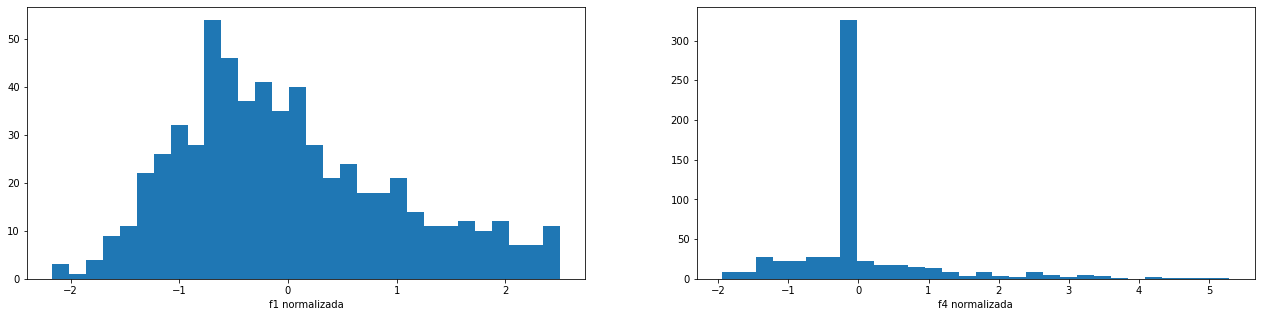

In [26]:
# Para ello, es necesario obtener el mejor valor de k, y sacar las prestaciones en test
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,201,2)

# Según chi2, escogería f4 y f1 
X_train_norm_chi2 = X_train_norm[:,[1, 4]]

plt.figure(figsize=(22,5))

plt.subplot(1,2,1)
plt.hist(X_train_norm_chi2[:,0],bins=30)
plt.xlabel('f1 normalizada')

plt.subplot(1,2,2)
plt.hist(X_train_norm_chi2[:,1],bins=30)
plt.xlabel('f4 normalizada')
plt.show()


#X_test_norm_chi2
X_test_norm_chi2 = X_test_norm[:,[1, 4]]



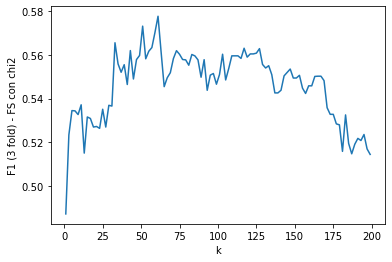

61


In [27]:
# Represento la tasa media de acierto en validación, para elegir el valor de k
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_chi2, Y_train, cv=3, scoring='f1')
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 (3 fold) - FS con chi2')
plt.show()

# Seleccionamos (de manera automática) el mejor valor de k  
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

El valor más adecuado de k vecinos más próximos es 61 pues el valor que consigue obtener mejor
F1. Este valor es diferente al obtenido con todas las características. 

In [28]:
# Diseñamos el clasificador KNN con el máximo valor
k_selec = 61
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_chi2, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_chi2)

print('FS con Chi-2. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_chi2, Y_test))
print('FS con Chi-2. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('FS con Chi-2. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))


FS con Chi-2. Accuracy en test con k= 61: 0.7207792207792207
FS con Chi-2. Sensibilidad en test con k= 61: 0.5
FS con Chi-2. Precisión en test con k= 61: 0.627906976744186


# 3.2. Entrega. Diseñar un clasificador k-nn con las mejores 2 características consideradas según información mútua. Comparar prestaciones 

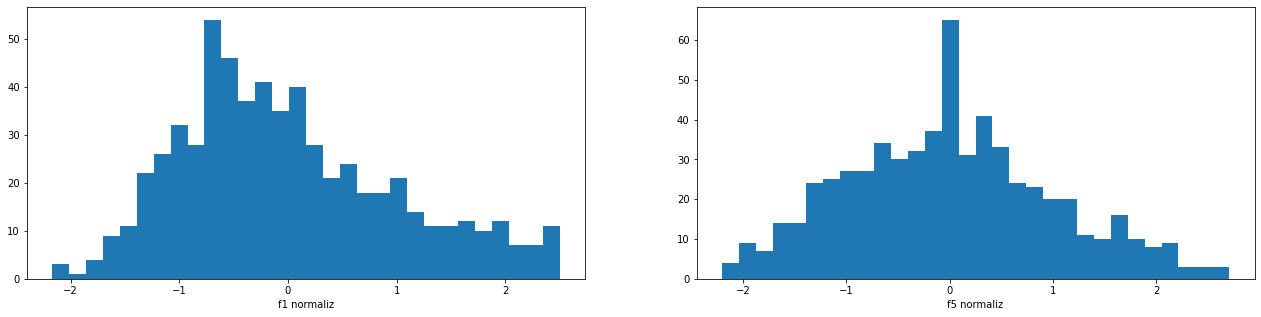

In [29]:
# Para ello, es necesario obtener el mejor valor de k, y sacar las prestaciones en test
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,201,2)

# Según información mutua, escogería f5 y f1 
X_train_norm_info = X_train_norm[:,[1, 5]]

plt.figure(figsize=(22,5))

plt.subplot(1,2,1)
plt.hist(X_train_norm_info[:,0],bins=30)
plt.xlabel('f1 normaliz')

plt.subplot(1,2,2)
plt.hist(X_train_norm_info[:,1],bins=30)
plt.xlabel('f5 normaliz')
plt.show()


#X_test_norm_info
X_test_norm_info = X_test_norm[:,[1, 5]]


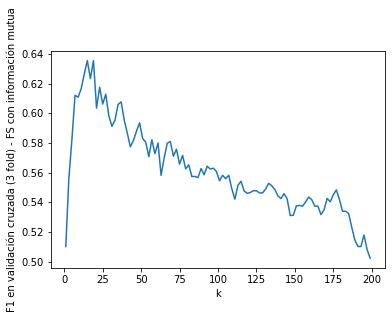

15


In [30]:
# Represento la tasa media de acierto en validación, para elegir el valor de k
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_info, Y_train, cv=3, scoring='f1')
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 en validación cruzada (3 fold) - FS con información mutua')
plt.show()

# Seleccionamos (de manera automática) el mejor valor de k  
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

El valor más adecuado de k vecinos más próximos es 15 pues el valor que consigue obtener mejor F1. Este valor es diferente al obtenido con todas las características.

In [31]:
# Diseñamos el clasificador KNN con el máximo valor
k_selec = 15
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_info, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_info)

print('FS con Chi-2. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_info, Y_test))
print('FS con Chi-2. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('FS con Chi-2. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

FS con Chi-2. Accuracy en test con k= 15: 0.7532467532467533
FS con Chi-2. Sensibilidad en test con k= 15: 0.5
FS con Chi-2. Precisión en test con k= 15: 0.7105263157894737


In [32]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy", "Sensibilidad","Precisión"],                             #################
                      "kNN con chi2" : ["0.721","0.5","0.628"],
                      "kNN con información mutua" : ["0.753","0.5","0.711"]})
Tabla

,Prestaciones,kNN con chi2,kNN con información mutua
0,Accuracy,0.721,0.753
1,Sensibilidad,0.5,0.5
2,Precisión,0.628,0.711


La selección de características con el criterio de información mutua es mejor a la selección mediante chi2. Esto significa que la variable f5 aporta algo más de información útil para predecir la variable de salida que la variable f4. Por otro lado, ambos métodos de selección de características consiguen una misma sensibilidad, capacidad para detectar a los diabéticos como realmente enfermos, siendo ésta 0.5, esto quiere decir que tienen la misma probabilidad de detectar correctamente como erróneamentea los diabéticos. Cabe destacar que el knn con información mutua cuando detecta a un diabético lo hace con mayor seguridad (70%).     


# 3.3. Entrega. Diseñar un clasificador k-nn con las mejores 4 características consideradas según chi2 y según información mútua. Comparar prestaciones 

## Considerando chi2

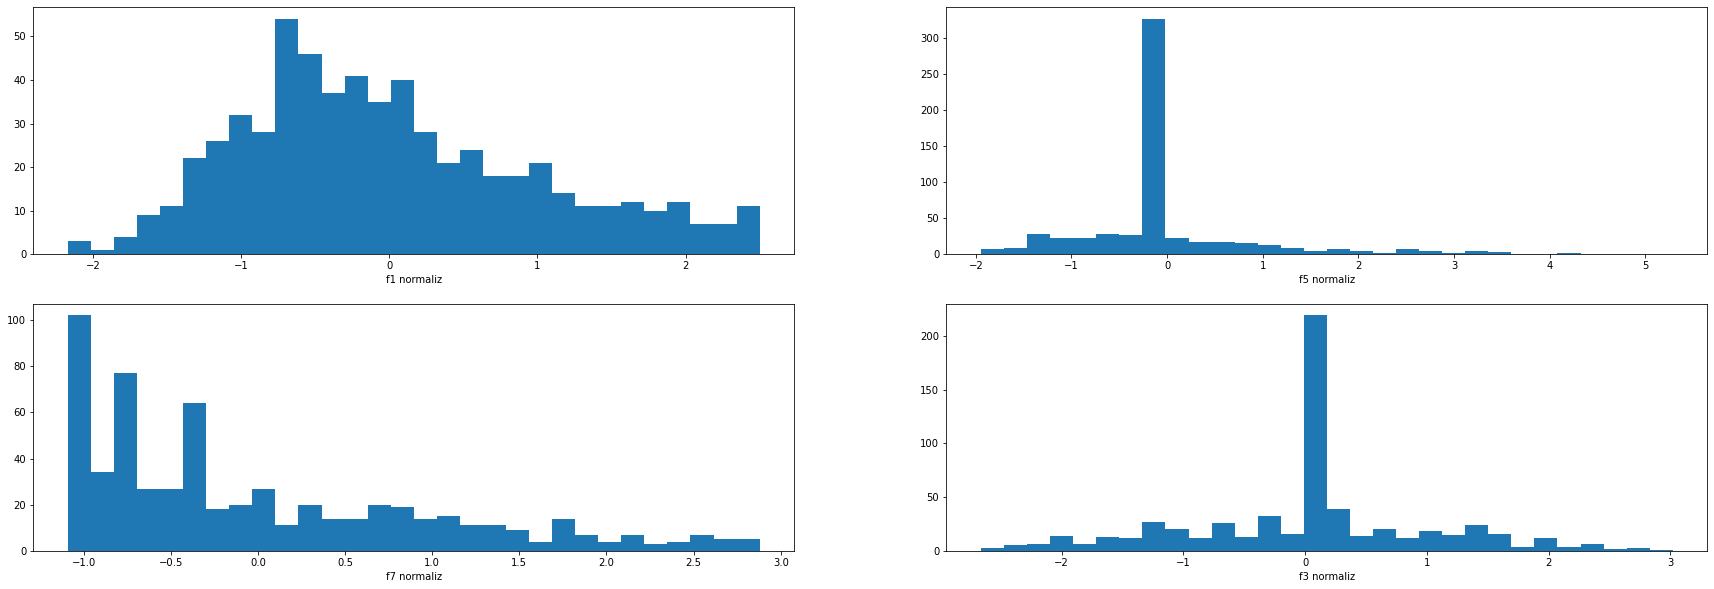

In [33]:
# Para ello, es necesario obtener el mejor valor de k, y sacar las prestaciones en test
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,51,2)

# Según información mutua, escogería f5 y f1 
X_train_norm_chi2_4 = X_train_norm[:,[1,4,7,3]]

plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.hist(X_train_norm_chi2_4[:,0],bins=30)
plt.xlabel('f1 normaliz')

plt.subplot(2,2,2)
plt.hist(X_train_norm_chi2_4[:,1],bins=30)
plt.xlabel('f5 normaliz')

plt.subplot(2,2,3)
plt.hist(X_train_norm_chi2_4[:,2],bins=30)
plt.xlabel('f7 normaliz')

plt.subplot(2,2,4)
plt.hist(X_train_norm_chi2_4[:,3],bins=30)
plt.xlabel('f3 normaliz')
plt.show()


#X_test_norm_info
X_test_norm_chi2_4 = X_test_norm[:,[1,4,7,3]]



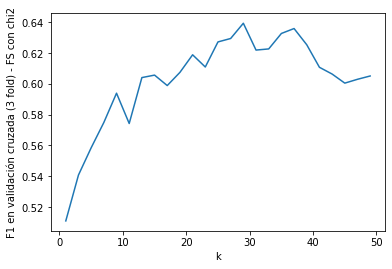

29


In [34]:
# Represento la tasa media de acierto en validación, para elegir el valor de k
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_chi2_4, Y_train, cv=3, scoring='f1')
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 en validación cruzada (3 fold) - FS con chi2')
plt.show()

# Seleccionamos (de manera automática) el mejor valor de k  
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

El valor más adecuado de k vecinos más próximos es 29 pues el valor que consigue obtener mejor F1.

In [35]:
# Diseñamos el clasificador KNN con el máximo valor
k_selec = 29
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_chi2_4, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_chi2_4)

print('FS con Chi-2. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_chi2_4, Y_test))
print('FS con Chi-2. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('FS con Chi-2. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

FS con Chi-2. Accuracy en test con k= 29: 0.7207792207792207
FS con Chi-2. Sensibilidad en test con k= 29: 0.5
FS con Chi-2. Precisión en test con k= 29: 0.627906976744186


## Considerando información mutua

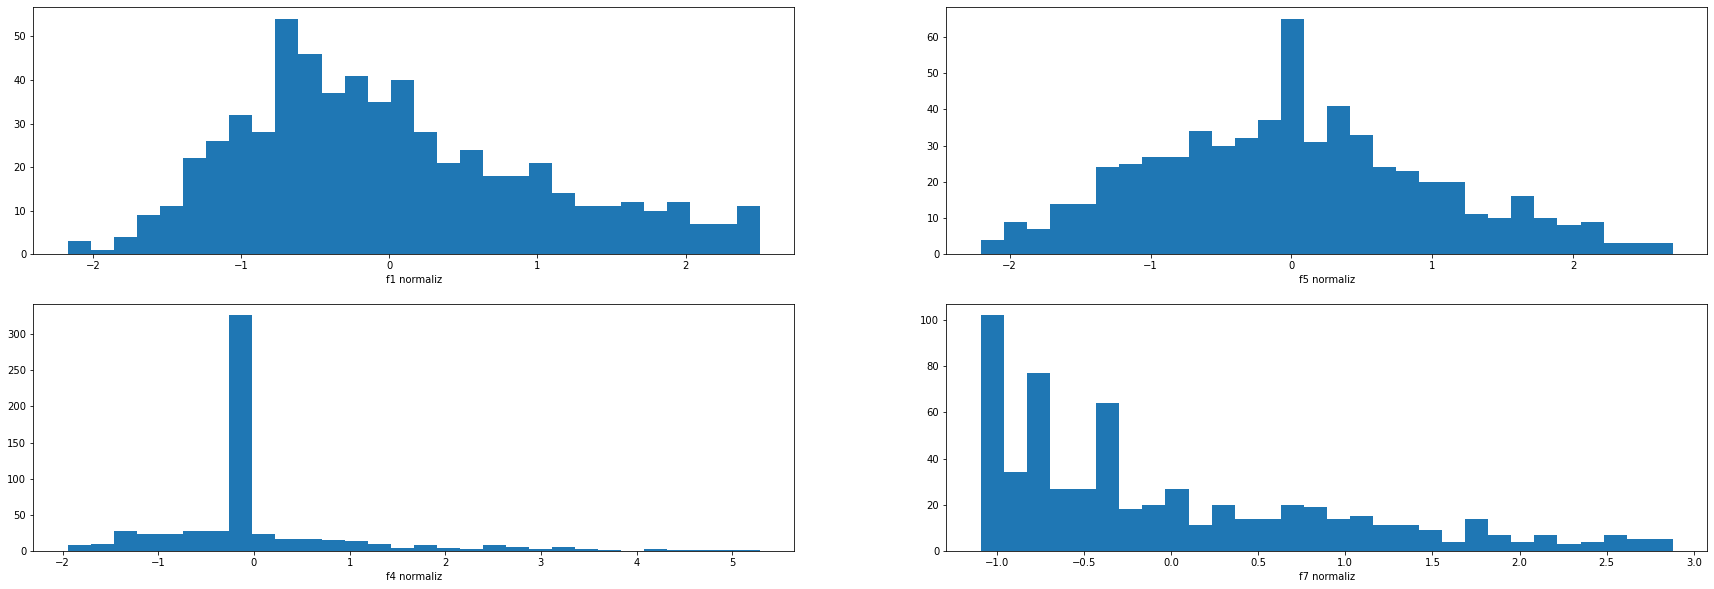

In [36]:
# Para ello, es necesario obtener el mejor valor de k, y sacar las prestaciones en test
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,201,2)

# Según información mutua, escogería f5 y f1 
X_train_norm_info_4 = X_train_norm[:,[1,5,4,7]]

plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
plt.hist(X_train_norm_info_4[:,0],bins=30)
plt.xlabel('f1 normaliz')

plt.subplot(2,2,2)
plt.hist(X_train_norm_info_4[:,1],bins=30)
plt.xlabel('f5 normaliz')

plt.subplot(2,2,3)
plt.hist(X_train_norm_info_4[:,2],bins=30)
plt.xlabel('f4 normaliz')

plt.subplot(2,2,4)
plt.hist(X_train_norm_info_4[:,3],bins=30)
plt.xlabel('f7 normaliz')
plt.show()


#X_test_norm_info
X_test_norm_info_4 = X_test_norm[:,[1,5,4,7]]



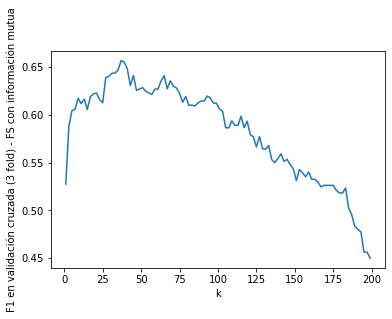

37


In [37]:
# Represento la tasa media de acierto en validación, para elegir el valor de k
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_info_4, Y_train, cv=3, scoring='f1')
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 en validación cruzada (3 fold) - FS con información mutua')
plt.show()

# Seleccionamos (de manera automática) el mejor valor de k  
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

El valor más adecuado de k vecinos más próximos es 37 pues el valor que consigue obtener mejor F1. 

In [38]:
# Diseñamos el clasificador KNN con el máximo valor
k_selec = 37
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_info_4, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_info_4)

print('FS con Chi-2. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_info_4, Y_test))
print('FS con Chi-2. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('FS con Chi-2. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

FS con Chi-2. Accuracy en test con k= 37: 0.7727272727272727
FS con Chi-2. Sensibilidad en test con k= 37: 0.5555555555555556
FS con Chi-2. Precisión en test con k= 37: 0.7317073170731707


In [39]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibilidad","Precisión"],                              #################
                      "kNN con chi2 4D" : ["0.721","0.5","0.628"],
                      "kNN con chi2 2D" : ["0.721","0.5","0.628"],
                      "kNN con información mutua 2D" : ["0.753","0.5","0.711"],
                      "kNN con información mutua 4D" : ["0.773","0.556","0.732"]})
Tabla

,Prestaciones,kNN con chi2 4D,kNN con chi2 2D,kNN con información mutua 2D,kNN con información mutua 4D
0,Accuracy,0.721,0.721,0.753,0.773
1,Sensibilidad,0.5,0.5,0.5,0.556
2,Precisión,0.628,0.628,0.711,0.732


La selección de características del clasificador KNN con las mejores 4 características, consideradas según información mutua, ofrece las mejores prestaciones en el conjunto de test. 


La selección de características con información mutua es ligeramente mejor a la selección mediante el estadístico chi2 utilizando las cuatro mejores variables. 

Corroborando la gráfica de selección de características con chi2 en la que había una gran diferencia entre las dos primeras variables y el resto, los resultados de las prestaciones se han mantenido al añadir las dos siguientes variables, por lo que éstas ni añaden ruido ni aportan nueva información. Por el contrario, con la información mutua, las cuatro primeras variables presentaban un mayor valor con respecto a las otras, por lo que al añadirlas ha mejorado la predicción. 

Por otro lado, se observa como se obtienen las mismas prestaciones con dos variables que con cuatro en los modelos knn con chi2. Por lo que, si el método chi2 fuera el elegido, sería conveniente utilizar únicamente las dos mejores variables ya que reduciría la carga computacional, obteniendo los mismos resultados que si fuera con cuatro. 

En conclusión, eligiendo 4 características, según la información mutua, para un modelo KNN se consigue una mayor precisión, sensibilidad y accuracy. 

# 4. Selección de características. Métodos wrapper con k-nn


Debe instalar el siguiente paquete: 

pip install git+git://github.com/rasbt/mlxtend.git


In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

# 4.1. Sequential Forward Selection

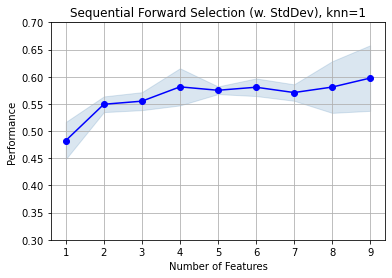

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.524822695035461, 0.4817518248175182, 0.4411...",0.482584,"(1,)",0.0768566,0.0341535,0.0241502
2,"(1, 6)","[0.5611510791366906, 0.5578231292517007, 0.529...",0.549335,"(1, 6)",0.0324513,0.0144207,0.010197
3,"(1, 5, 6)","[0.5611510791366906, 0.5714285714285715, 0.532...",0.555016,"(1, 5, 6)",0.0371008,0.0164868,0.0116579
4,"(1, 5, 6, 8)","[0.5428571428571428, 0.6258503401360545, 0.575...",0.58135,"(1, 5, 6, 8)",0.0768422,0.0341471,0.0241456
5,"(1, 3, 5, 6, 8)","[0.5652173913043478, 0.581081081081081, 0.5789...",0.575082,"(1, 3, 5, 6, 8)",0.0158186,0.00702947,0.00497059
6,"(1, 3, 5, 6, 7, 8)","[0.5578231292517006, 0.5906040268456376, 0.593...",0.580659,"(1, 3, 5, 6, 7, 8)",0.0364367,0.0161917,0.0114493
7,"(1, 2, 3, 5, 6, 7, 8)","[0.5620915032679739, 0.5921052631578948, 0.558...",0.570879,"(1, 2, 3, 5, 6, 7, 8)",0.0339411,0.0150827,0.0106651
8,"(0, 1, 2, 3, 5, 6, 7, 8)","[0.6124999999999999, 0.6164383561643835, 0.513...",0.580942,"(0, 1, 2, 3, 5, 6, 7, 8)",0.106758,0.0474413,0.033546
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.6133333333333332, 0.6621621621621622, 0.517...",0.597501,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.135712,0.0603077,0.042644


In [41]:
valor_k = 1
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           scoring='f1',
           cv=3)

sfs = sfs.fit(X_train_norm, Y_train)

# Descomentar estos comandos cuando sepamos el número de características y el valor de k con el que nos quedaremos
#print('\nSequential Forward Selection (número caracter=3):')
#print(sfs.k_feature_idx_)
#print('CV Score:')
#print(sfs.k_score_)

# Plotting the results
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T



Para k = 1, el mejor F1 se obtiene con 9 características, las cuales son (0, 1, 2, 3, 4, 5, 6, 7, 8) con un valor de 0.597501


Sequential Forward Selection (número caracter=3):
(0, 1, 2, 3, 4, 5, 6, 7, 8)
CV Score:
0.6052856779630235


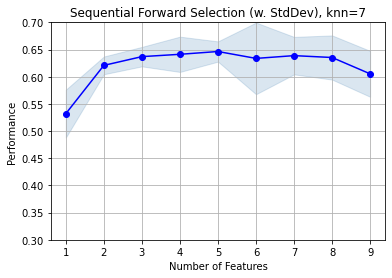

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5271317829457364, 0.5882352941176471, 0.480...",0.531996,"(1,)",0.0991678,0.0440681,0.0311609
2,"(1, 7)","[0.6106870229007634, 0.608, 0.6438356164383562]",0.620841,"(1, 7)",0.0366729,0.0162967,0.0115235
3,"(0, 1, 7)","[0.6119402985074627, 0.6461538461538462, 0.652...",0.636957,"(0, 1, 7)",0.0402701,0.0178952,0.0126538
4,"(0, 1, 5, 7)","[0.5954198473282444, 0.6666666666666666, 0.661...",0.641247,"(0, 1, 5, 7)",0.0730663,0.0324692,0.0229592
5,"(0, 1, 5, 7, 8)","[0.6201550387596899, 0.6616541353383459, 0.657...",0.646384,"(0, 1, 5, 7, 8)",0.0419236,0.01863,0.0131734
6,"(0, 1, 4, 5, 7, 8)","[0.5426356589147286, 0.6962962962962963, 0.662...",0.633698,"(0, 1, 4, 5, 7, 8)",0.148255,0.0658815,0.0465852
7,"(0, 1, 2, 4, 5, 7, 8)","[0.6086956521739131, 0.6870229007633588, 0.620...",0.638803,"(0, 1, 2, 4, 5, 7, 8)",0.0775162,0.0344466,0.0243574
8,"(0, 1, 2, 4, 5, 6, 7, 8)","[0.6212121212121212, 0.6906474820143885, 0.594...",0.635354,"(0, 1, 2, 4, 5, 6, 7, 8)",0.091416,0.0406234,0.0287251
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.56, 0.6616541353383459, 0.5942028985507247]",0.605286,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0950394,0.0422336,0.0298636


In [42]:
# Sequential Forward Selection
valor_k = 7
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           scoring='f1',
           cv=3)

sfs = sfs.fit(X_train_norm, Y_train)

# Descomentar estos comandos cuando sepamos el número de características y el valor de k con el que nos quedaremos
print('\nSequential Forward Selection (número caracter=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

# Plotting the results
fig2 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T



Para k = 7, el mejor F1 se obtiene con 5 características, las cuales son (0, 1, 5, 7, 8) con un valor de 0.646384

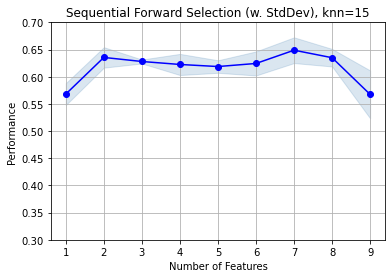

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5692307692307692, 0.592, 0.5428571428571428]",0.568029,"(1,)",0.0451877,0.0200805,0.014199
2,"(1, 5)","[0.6617647058823529, 0.6259541984732825, 0.618...",0.635475,"(1, 5)",0.0423601,0.018824,0.0133106
3,"(1, 3, 5)","[0.6259541984732824, 0.625, 0.6330935251798561]",0.628016,"(1, 3, 5)",0.00812704,0.00361149,0.00255371
4,"(1, 2, 3, 5)","[0.6461538461538462, 0.6229508196721312, 0.598...",0.622548,"(1, 2, 3, 5)",0.0437471,0.0194403,0.0137464
5,"(1, 2, 3, 5, 7)","[0.6307692307692307, 0.6031746031746031, 0.622...",0.618722,"(1, 2, 3, 5, 7)",0.0259556,0.0115341,0.00815587
6,"(1, 2, 3, 5, 6, 7)","[0.6250000000000001, 0.6511627906976745, 0.597...",0.624393,"(1, 2, 3, 5, 6, 7)",0.0497547,0.0221099,0.0156341
7,"(1, 2, 3, 4, 5, 6, 7)","[0.6511627906976745, 0.676470588235294, 0.6187...",0.648779,"(1, 2, 3, 4, 5, 6, 7)",0.0532041,0.0236428,0.016718
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6307692307692307, 0.6564885496183206, 0.617...",0.634968,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0363036,0.0161326,0.0114074
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5245901639344263, 0.628099173553719, 0.5496...",0.567436,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0992295,0.0440956,0.0311803


In [43]:
# Sequential Forward Selection
valor_k = 15
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           scoring='f1',
           cv=3)

sfs = sfs.fit(X_train_norm, Y_train)


# Plotting the results
fig3 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T



Para k = 15, el mejor F1 se obtiene con 7 características, las cuales son (1, 2, 3, 4, 5, 6, 7) con un valor de 0.648779. 

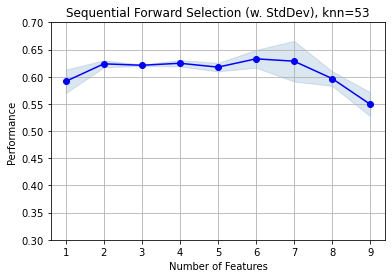

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6176470588235293, 0.592, 0.564885496183206]",0.591511,"(1,)",0.0484779,0.0215426,0.0152329
2,"(1, 7)","[0.6153846153846154, 0.6307692307692307, 0.625...",0.623718,"(1, 7)",0.0142802,0.00634583,0.00448718
3,"(1, 5, 7)","[0.6201550387596899, 0.6229508196721312, 0.620...",0.621087,"(1, 5, 7)",0.00296581,0.00131794,0.000931927
4,"(1, 4, 5, 7)","[0.6307692307692307, 0.6166666666666667, 0.626...",0.624767,"(1, 4, 5, 7)",0.0133793,0.00594549,0.0042041
5,"(1, 4, 5, 7, 8)","[0.6093749999999999, 0.628099173553719, 0.6153...",0.61762,"(1, 4, 5, 7, 8)",0.0175655,0.00780577,0.00551951
6,"(1, 3, 4, 5, 7, 8)","[0.624, 0.6557377049180328, 0.6190476190476191]",0.632928,"(1, 3, 4, 5, 7, 8)",0.0365787,0.0162548,0.0114939
7,"(1, 3, 4, 5, 6, 7, 8)","[0.6776859504132232, 0.6206896551724138, 0.587...",0.628559,"(1, 3, 4, 5, 6, 7, 8)",0.0839744,0.0373165,0.0263867
8,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.6153846153846154, 0.5892857142857143, 0.585...",0.596679,"(0, 1, 3, 4, 5, 6, 7, 8)",0.0299823,0.0133235,0.00942115
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5714285714285714, 0.5192307692307692, 0.557...",0.549345,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0496275,0.0220535,0.0155941


In [44]:
# Sequential Forward Selection
valor_k = 53
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           scoring='f1',
           cv=3)

sfs = sfs.fit(X_train_norm, Y_train)


# Plotting the results
fig4 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T



Para k = 53, el mejor F1 se obtiene con 6 características, las cuales son (1, 3, 4, 5, 7, 8)	 con un valor de 0.632928.

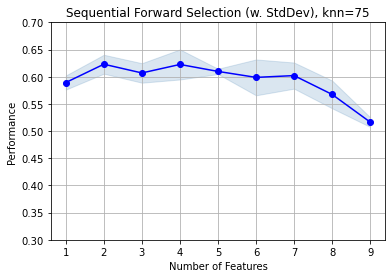

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6074074074074073, 0.5826771653543307, 0.577...",0.589287,"(1,)",0.0291821,0.0129679,0.00916971
2,"(1, 7)","[0.6153846153846154, 0.6065573770491803, 0.647...",0.623,"(1, 7)",0.039132,0.0173895,0.0122962
3,"(1, 5, 7)","[0.6299212598425198, 0.5862068965517241, 0.604...",0.606926,"(1, 5, 7)",0.0403229,0.0179187,0.0126704
4,"(1, 4, 5, 7)","[0.608, 0.6612903225806451, 0.5984251968503937]",0.622572,"(1, 4, 5, 7)",0.0622345,0.0276557,0.0195556
5,"(1, 3, 4, 5, 7)","[0.6065573770491802, 0.6166666666666667, 0.606...",0.609762,"(1, 3, 4, 5, 7)",0.0109971,0.00488686,0.00345554
6,"(1, 3, 4, 5, 7, 8)","[0.6393442622950819, 0.5585585585585585, 0.598...",0.598776,"(1, 3, 4, 5, 7, 8)",0.0742194,0.0329816,0.0233215
7,"(1, 3, 4, 5, 6, 7, 8)","[0.6324786324786325, 0.6, 0.5737704918032787]",0.602083,"(1, 3, 4, 5, 6, 7, 8)",0.0540365,0.0240127,0.0169796
8,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.603448275862069, 0.5471698113207547, 0.5517...",0.567447,"(0, 1, 3, 4, 5, 6, 7, 8)",0.057438,0.0255243,0.0180484
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5185185185185185, 0.5048543689320388, 0.526...",0.516563,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0199605,0.00887004,0.00627207


In [45]:
# Sequential Forward Selection
valor_k = 75
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           scoring='f1',
           cv=3)

sfs = sfs.fit(X_train_norm, Y_train)


# Plotting the results
fig4 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T



Para k = 75, el mejor F1 se obtiene con 2 características, las cuales son (1, 7) con un valor de 0.623.

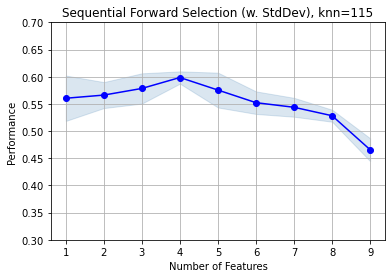

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6141732283464567, 0.5546218487394957, 0.512...",0.560397,"(1,)",0.0939519,0.0417503,0.0295219
2,"(1, 7)","[0.5499999999999999, 0.5486725663716815, 0.6]",0.566224,"(1, 7)",0.0537587,0.0238893,0.0168923
3,"(1, 5, 7)","[0.5882352941176471, 0.5405405405405407, 0.606...",0.578444,"(1, 5, 7)",0.0626183,0.0278263,0.0196761
4,"(1, 4, 5, 7)","[0.6115702479338843, 0.584070796460177, 0.6]",0.598547,"(1, 4, 5, 7)",0.0253691,0.0112735,0.00797158
5,"(1, 3, 4, 5, 7)","[0.6153846153846154, 0.5370370370370371, 0.573...",0.575445,"(1, 3, 4, 5, 7)",0.0720186,0.0320036,0.02263
6,"(1, 3, 4, 5, 7, 8)","[0.5585585585585585, 0.5242718446601942, 0.573...",0.552248,"(1, 3, 4, 5, 7, 8)",0.0466975,0.0207514,0.0146735
7,"(1, 2, 3, 4, 5, 7, 8)","[0.5555555555555556, 0.5192307692307692, 0.556...",0.543769,"(1, 2, 3, 4, 5, 7, 8)",0.0390565,0.0173559,0.0122725
8,"(1, 2, 3, 4, 5, 6, 7, 8)","[0.5185185185185185, 0.5436893203883495, 0.522...",0.528243,"(1, 2, 3, 4, 5, 6, 7, 8)",0.0248516,0.0110435,0.00780895
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.4554455445544554, 0.49504950495049505, 0.44...",0.465699,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0474046,0.0210656,0.0148957


In [46]:
# Sequential Forward Selection
valor_k = 115
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           scoring='f1',
           cv=3)

sfs = sfs.fit(X_train_norm, Y_train)


# Plotting the results
fig4 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

Para k = 115, el mejor F1 se obtiene con 4 características, las cuales son (1, 4, 5, 7) con un valor de 0.598547.

For our convenience, we can visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict method of the SequentialFeatureSelector object. The columns std_dev and std_err represent the standard deviation and standard errors of the cross-validation scores, respectively.

Below, we see the DataFrame of the Sequential Forward Selector from Example 2:

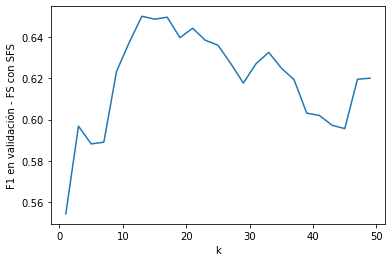

13


In [47]:
# Método Wrapper con FS. Cogemos el que MEJORES PRESTACIONES OFRECE EN VALIDACION
# Corresponde a k=15 y 7 características, que son los índices 1, 2, 3, 4, 5, 6, 7

# Según SFS, escogería f1, f2, f3, f4, F5, F6 y f7
X_train_norm_SFS = X_train_norm[:,[1, 2, 3, 4, 5, 6, 7]]
X_test_norm_SFS = X_test_norm[:,[1, 2, 3, 4, 5, 6, 7]]

# Podríamos hacerlo con k=15, pero vamos a explorar el valor de k
k_values = range(1,50,2)


cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_SFS, Y_train, cv=3, scoring='f1')
#    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 en validación - FS con SFS')
plt.show()




# Seleccionamos el máximo valor 
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])



Con las características seleccionadas anteriormente en validación, el valor más adecuado de número de vecinos es 13, pues consigue el mayor F1 también en validación. 

In [48]:
# Diseñamos el clasificador KNN con el máximo valor de SFS
k_selec = 13
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_SFS, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_SFS)

print('SFS. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_SFS, Y_test))
print('SFS. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('SFS. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

SFS. Accuracy en test con k= 13: 0.7207792207792207
SFS. Sensibilidad en test con k= 13: 0.4444444444444444
SFS. Precisión en test con k= 13: 0.6486486486486487


# 4.2. Sequential Backward Elimination

Se va a realizar el mismo procedimiento. La única diferencia se encuentra en el método de wrapper utilizado. 

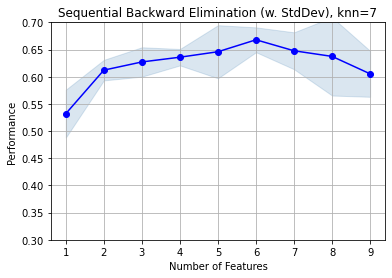

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.56, 0.6616541353383459, 0.5942028985507247]",0.605286,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0950394,0.0422336,0.0298636
8,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.583941605839416, 0.7391304347826085, 0.5890...",0.637371,"(0, 1, 3, 4, 5, 6, 7, 8)",0.16199,0.0719849,0.050901
7,"(1, 3, 4, 5, 6, 7, 8)","[0.6666666666666666, 0.676470588235294, 0.6000...",0.647712,"(1, 3, 4, 5, 6, 7, 8)",0.0764535,0.0339744,0.0240235
6,"(1, 3, 4, 5, 6, 8)","[0.6814814814814814, 0.6865671641791045, 0.635...",0.667937,"(1, 3, 4, 5, 6, 8)",0.0514106,0.0228458,0.0161544
5,"(1, 3, 5, 6, 8)","[0.7067669172932329, 0.5873015873015874, 0.643...",0.645968,"(1, 3, 5, 6, 8)",0.109804,0.0487948,0.0345031
4,"(1, 3, 5, 6)","[0.6569343065693432, 0.6222222222222222, 0.628...",0.635909,"(1, 3, 5, 6)",0.0339601,0.0150912,0.0106711
3,"(1, 3, 5)","[0.6616541353383459, 0.6241134751773049, 0.595...",0.627171,"(1, 3, 5)",0.0607457,0.0269941,0.0190877
2,"(1, 5)","[0.6376811594202899, 0.5925925925925926, 0.606...",0.612111,"(1, 5)",0.0425268,0.018898,0.0133629
1,"(1,)","[0.5271317829457364, 0.5882352941176471, 0.480...",0.531996,"(1,)",0.0991678,0.0440681,0.0311609


In [49]:
# Sequential Backward Selection
valor_k = 7
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='f1',
          cv=3)
sbs = sbs.fit(X_train_norm, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

Para k = 7, el mejor F1 se obtiene con 6 características, las cuales son (1, 3, 4, 5, 6, 8) con un valor de 0.667937.

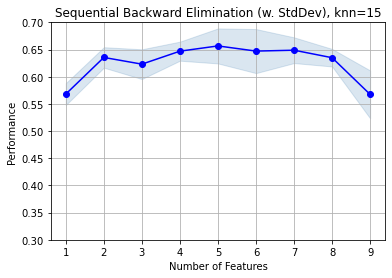

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5245901639344263, 0.628099173553719, 0.5496...",0.567436,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0992295,0.0440956,0.0311803
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.6307692307692307, 0.6564885496183206, 0.617...",0.634968,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0363036,0.0161326,0.0114074
7,"(1, 2, 3, 4, 5, 6, 7)","[0.6511627906976745, 0.676470588235294, 0.6187...",0.648779,"(1, 2, 3, 4, 5, 6, 7)",0.0532041,0.0236428,0.016718
6,"(1, 3, 4, 5, 6, 7)","[0.6356589147286822, 0.7014925373134329, 0.604...",0.647156,"(1, 3, 4, 5, 6, 7)",0.0911301,0.0404963,0.0286352
5,"(1, 4, 5, 6, 7)","[0.6119402985074627, 0.6865671641791045, 0.671...",0.656645,"(1, 4, 5, 6, 7)",0.0724825,0.0322097,0.0227757
4,"(1, 5, 6, 7)","[0.6370370370370372, 0.6716417910447761, 0.632...",0.647011,"(1, 5, 6, 7)",0.0394293,0.0175216,0.0123896
3,"(1, 5, 6)","[0.6617647058823529, 0.6046511627906976, 0.602...",0.623119,"(1, 5, 6)",0.061514,0.0273355,0.0193291
2,"(1, 5)","[0.6617647058823529, 0.6259541984732825, 0.618...",0.635475,"(1, 5)",0.0423601,0.018824,0.0133106
1,"(1,)","[0.5692307692307692, 0.592, 0.5428571428571428]",0.568029,"(1,)",0.0451877,0.0200805,0.014199


In [50]:
# Sequential Backward Selection
valor_k = 15
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='f1',
          cv=3)
sbs = sbs.fit(X_train_norm, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

Para k = 15, el mejor F1 se obtiene con 5 características, las cuales son (1, 4, 5, 6, 7) con un valor de 0.656645. 

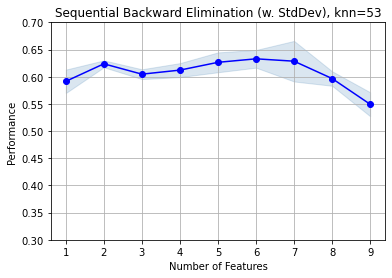

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5714285714285714, 0.5192307692307692, 0.557...",0.549345,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0496275,0.0220535,0.0155941
8,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.6153846153846154, 0.5892857142857143, 0.585...",0.596679,"(0, 1, 3, 4, 5, 6, 7, 8)",0.0299823,0.0133235,0.00942115
7,"(1, 3, 4, 5, 6, 7, 8)","[0.6776859504132232, 0.6206896551724138, 0.587...",0.628559,"(1, 3, 4, 5, 6, 7, 8)",0.0839744,0.0373165,0.0263867
6,"(1, 3, 4, 5, 7, 8)","[0.624, 0.6557377049180328, 0.6190476190476191]",0.632928,"(1, 3, 4, 5, 7, 8)",0.0365787,0.0162548,0.0114939
5,"(1, 3, 4, 7, 8)","[0.6446280991735536, 0.6333333333333333, 0.601...",0.626488,"(1, 3, 4, 7, 8)",0.041088,0.0182586,0.0129108
4,"(1, 3, 7, 8)","[0.6065573770491802, 0.6, 0.6299212598425197]",0.61216,"(1, 3, 7, 8)",0.0288977,0.0128416,0.00908036
3,"(1, 7, 8)","[0.592, 0.6101694915254238, 0.6119402985074627]",0.604703,"(1, 7, 8)",0.0202791,0.00901161,0.00637217
2,"(1, 7)","[0.6153846153846154, 0.6307692307692307, 0.625...",0.623718,"(1, 7)",0.0142802,0.00634583,0.00448718
1,"(1,)","[0.6176470588235293, 0.592, 0.564885496183206]",0.591511,"(1,)",0.0484779,0.0215426,0.0152329


In [51]:
# Sequential Backward Selection
valor_k = 53
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='f1',
          cv=3)
sbs = sbs.fit(X_train_norm, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

Para k = 53, el mejor F1 se obtiene con 6 características, las cuales son (1, 3, 4, 5, 7, 8) con un valor de 0.632928. 

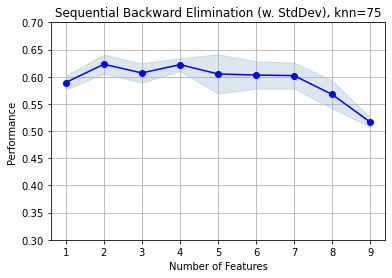

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5185185185185185, 0.5048543689320388, 0.526...",0.516563,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.0199605,0.00887004,0.00627207
8,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.603448275862069, 0.5471698113207547, 0.5517...",0.567447,"(0, 1, 3, 4, 5, 6, 7, 8)",0.057438,0.0255243,0.0180484
7,"(1, 3, 4, 5, 6, 7, 8)","[0.6324786324786325, 0.6, 0.5737704918032787]",0.602083,"(1, 3, 4, 5, 6, 7, 8)",0.0540365,0.0240127,0.0169796
6,"(1, 3, 5, 6, 7, 8)","[0.638655462184874, 0.5871559633027522, 0.5833...",0.603048,"(1, 3, 5, 6, 7, 8)",0.0567677,0.0252264,0.0178378
5,"(1, 5, 6, 7, 8)","[0.6495726495726496, 0.5607476635514019, 0.605...",0.605121,"(1, 5, 6, 7, 8)",0.081603,0.0362627,0.0256416
4,"(1, 5, 7, 8)","[0.624, 0.6071428571428571, 0.6356589147286821]",0.622267,"(1, 5, 7, 8)",0.0263422,0.0117059,0.00827734
3,"(1, 5, 7)","[0.6299212598425198, 0.5862068965517241, 0.604...",0.606926,"(1, 5, 7)",0.0403229,0.0179187,0.0126704
2,"(1, 7)","[0.6153846153846154, 0.6065573770491803, 0.647...",0.623,"(1, 7)",0.039132,0.0173895,0.0122962
1,"(1,)","[0.6074074074074073, 0.5826771653543307, 0.577...",0.589287,"(1,)",0.0291821,0.0129679,0.00916971


In [52]:
# Sequential Backward Selection
valor_k = 75
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='f1',
          cv=3)
sbs = sbs.fit(X_train_norm, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 0.7])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

Para k = 75, el mejor f1 se obtiene con 2 características, las cuales son (1, 7) con un valor de 0.623.

Se elige k=15 con las características 1, 4, 5, 6 y 7 en vez de k=7 con las características 1, 3, 4, 5, 6 y 8, ya que se tiene conocimiento a priori de que la característica 8 es irrelevante y la diferencia del valor F1 obtenido es muy bajo. 

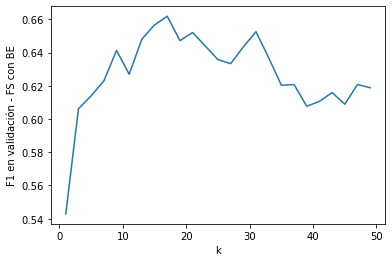

17


In [53]:
# Método Wrapper con FS - BACKWARD ELIMINATION. Cogemos el que MEJORES PRESTACIONES OFRECE EN VALIDACION
# Corresponde a k=15 y 5 características, que son los índices (1, 4, 5, 6, 7)

# Según BE, escogería f1, f4, f5, f6 y f7  
X_train_norm_BE = X_train_norm[:,[1, 4, 5, 6, 7]]
X_test_norm_BE = X_test_norm[:,[1, 4, 5, 6, 7]]

# Podríamos hacerlo con k=7, pero vamos a explorar el valor de k
k_values = range(1,50,2)


cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_BE, Y_train, cv=3, scoring='f1')
#    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 en validación - FS con BE')
plt.show()




# Seleccionamos el máximo valor 
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])


Con las características seleccionadas anteriormente en validación, el valor más adecuado de número de vecinos es 17, pues consigue el mayor F1 también en validación.

In [54]:
# Diseñamos el clasificador KNN con el máximo valor de SFS
k_selec = 17
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_BE, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_BE)

print('SBS. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_BE, Y_test))
print('SBS. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('SBS. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

SBS. Accuracy en test con k= 17: 0.7532467532467533
SBS. Sensibilidad en test con k= 17: 0.48148148148148145
SBS. Precisión en test con k= 17: 0.7222222222222222


# Entrega

**Discuta sobre los resultados obtenidos y las características seleccionadas considerando tanto selección secuencia de características  como la eliminación secuencial de características.** 


In [55]:
Tabla = pd.DataFrame({ "Wrapper":["SFS","SBS"],
                      "kNN K=1" : [" 0.581- (1, 5, 6, 8)","-"],
                      "kNN K=7" : ["0.646 - (0, 1, 5, 7, 8)","0.668 - (1, 3, 4, 5, 6, 8)"],
                      "kNN k=15" : ["0.649 - (1, 2, 3, 4, 5, 6, 7)","0.657 - (1, 4, 5, 6, 7)"],
                      "kNN k=53" : ["0.633 - (1, 3, 4, 5, 7, 8)","0.633 - (1, 3, 4, 5, 7, 8)"],
                      "kNN k=75" : ["0.623 - (1, 7)","0.623 - (1, 7)"],
                      "kNN k=115" : ["0.599 - (1, 4, 5, 7)","-"]})
Tabla

,Wrapper,kNN K=1,kNN K=7,kNN k=15,kNN k=53,kNN k=75,kNN k=115
0,SFS,"0.581- (1, 5, 6, 8)","0.646 - (0, 1, 5, 7, 8)","0.649 - (1, 2, 3, 4, 5, 6, 7)","0.633 - (1, 3, 4, 5, 7, 8)","0.623 - (1, 7)","0.599 - (1, 4, 5, 7)"
1,SBS,-,"0.668 - (1, 3, 4, 5, 6, 8)","0.657 - (1, 4, 5, 6, 7)","0.633 - (1, 3, 4, 5, 7, 8)","0.623 - (1, 7)",-


En la tabla se puede observar que para cada valor de k y para cada método wrapper hay un valor de F1 con sus correspondientes características elegidas como las más adecuadas.

Además, se puede observar que a partir de un valor de k, el F1, obtenido con la selección de características, disminuye. 

Atendiendo a las resulados en el conjunto de validación, las características seleccionadas, considerando la eliminación secuencial de características obtiene mejor F1. 

Las características seleccionadas considerando selección secuencia de características son 1, 2, 3, 4, 5, 6 y 7 ya que presenta el mayor F1. En cambio, las características seleccionadas, considerando la eliminación secuencial de características, son 1, 4, 5, 6 y 7. A ambas le corresponde un valor de k = 15.

Cabe destacar que se ha eligido en SBS k=15 con las características 1, 4, 5, 6 y 7 en vez de k=7 con las características 1, 3, 4, 5, 6 y 8, ya que se tiene conocimiento a priori de que la característica 8 es irrelevante y la diferencia del valor F1 obtenido es muy bajo.

No obstante, a partir de los resultados obtenidos se realiza un GridSearch con cada una de estas combinaciones de características, obteniendo valores de k más adecuados (mejor F1). Siendo éstos k = 13 y k = 17 respectivamente. 

Ambos métodos coinciden en la selección de 1, 4, 5, 6 y 7.

**Si compara los resultados obtenidos con los proporcionados con los métodos filter, ¿cree que se ajustan los resultados a lo que habría esperado a partir de la teoría? ¿por qué?**

In [56]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibilidad","Precisión"],                  ############################
                      "kNN con chi2 4D" : ["0.721","0.5","0.628"], 
                      "kNN con chi2 2D" : ["0.721","0.5","0.628"],
                      "kNN con información mutua 2D" : ["0.753","0.5","0.711"],
                      "kNN con información mutua 4D" : ["0.773","0.556","0.732"],
                      "SFS 7D":["0.721","0.444","0.649"],
                       "SBS 5D":["0.753","0.481","0.722"]})
Tabla


,Prestaciones,kNN con chi2 4D,kNN con chi2 2D,kNN con información mutua 2D,kNN con información mutua 4D,SFS 7D,SBS 5D
0,Accuracy,0.721,0.721,0.753,0.773,0.721,0.753
1,Sensibilidad,0.5,0.5,0.5,0.556,0.444,0.481
2,Precisión,0.628,0.628,0.711,0.732,0.649,0.722


Teóricamente los métodos wrapper como seleccionan características de acuerdo con su capacidad predictiva, tanto SFS como SBS, deberían de obtener resultados mejores o iguales que los métodos filters. No obstante, no se aprecia en estos resultados, pues información mutua con 4 características obtiene las mejores prestaciones.

A partir de esta tabla se observa que SFS comparte el mismo Accuracy que el los modelos knn chi2 con 2 y 4 características. Sin embargo, la precisión es mayor en SFS y la sensibilidad es mayor con chi2. Por lo que la decisión de elegir un método u otro se basará dependiendo del principal objetivo del problema y como éste se quiera abordar. 

Por otro lado, se observa que SBS comparte el mismo Accuracy que el modelo knn información mutua con 2 características. No obstante, la precisión es mayor en SBS y la sensibilidad es mayor con información mutua con 2 características. Por lo tanto, se está ante la misma situación de qué modelo a elegir va a depender del objetivo principal como ocurre con SFS y chi2. 

Que la selección de características no haya obtenido los mejores resultados puede ser debido a la partición realizada, al desbalanceo de clases o incluso al preprocesado que no haya sido el adecuado.

# 4. Selección de características. Métodos embedded

Hacemos uso de bosques aleatorios de árboles de clasificación para evaluar la importancia de las características en una tarea de clasificación.



Feature ranking:
1. Característica 1 (0.234237)
2. Característica 7 (0.135589)
3. Característica 5 (0.122437)
4. Característica 6 (0.094699)
5. Característica 0 (0.091474)
6. Característica 8 (0.085394)
7. Característica 3 (0.084136)
8. Característica 2 (0.080166)
9. Característica 4 (0.071868)


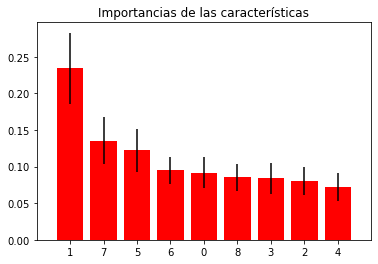

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles no es necesario que las características estén normalizadas, trabajamos con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancias de las características")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Entrega

- **Diseñe un clasificador basado en árboles y en las 4 características seleccionadas con el método embedded. Incluya las celdas necesarias.**



In [58]:
from sklearn import tree
from sklearn.model_selection import  GridSearchCV

X_train_FT = X_train[:,[1, 7, 5, 6]]
X_test_FT = X_test[:,[1, 7, 5, 6]]


# Parámetros libres
max_depth = np.arange(1, 21)
min_samples_leaf = np.arange(1,100,5)

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3,15), "min_samples_leaf":min_samples_leaf}

# Creamos un árbol de clasificación
dtree_model=tree.DecisionTreeClassifier()

# Usamos gridsearch para evluar los parámetros
dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)


dtree_model=dtree_model.fit(X_train_FT, Y_train)
print(dtree_model.best_params_)

# Entrenamos el modelo
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_FT, Y_train)

## Predecimos usando X_test
y_pred=my_tree.predict(X_test_FT)

print('Embebbed. Accuracy en test' , my_tree.score(X_test_FT, Y_test))
print('Embebbed. Sensibilidad en test' , recall_score(Y_test, y_pred))
print('Embebbed. Precisión en test con' , precision_score(Y_test, y_pred))

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6}
Embebbed. Accuracy en test 0.7597402597402597
Embebbed. Sensibilidad en test 0.5185185185185185
Embebbed. Precisión en test con 0.717948717948718


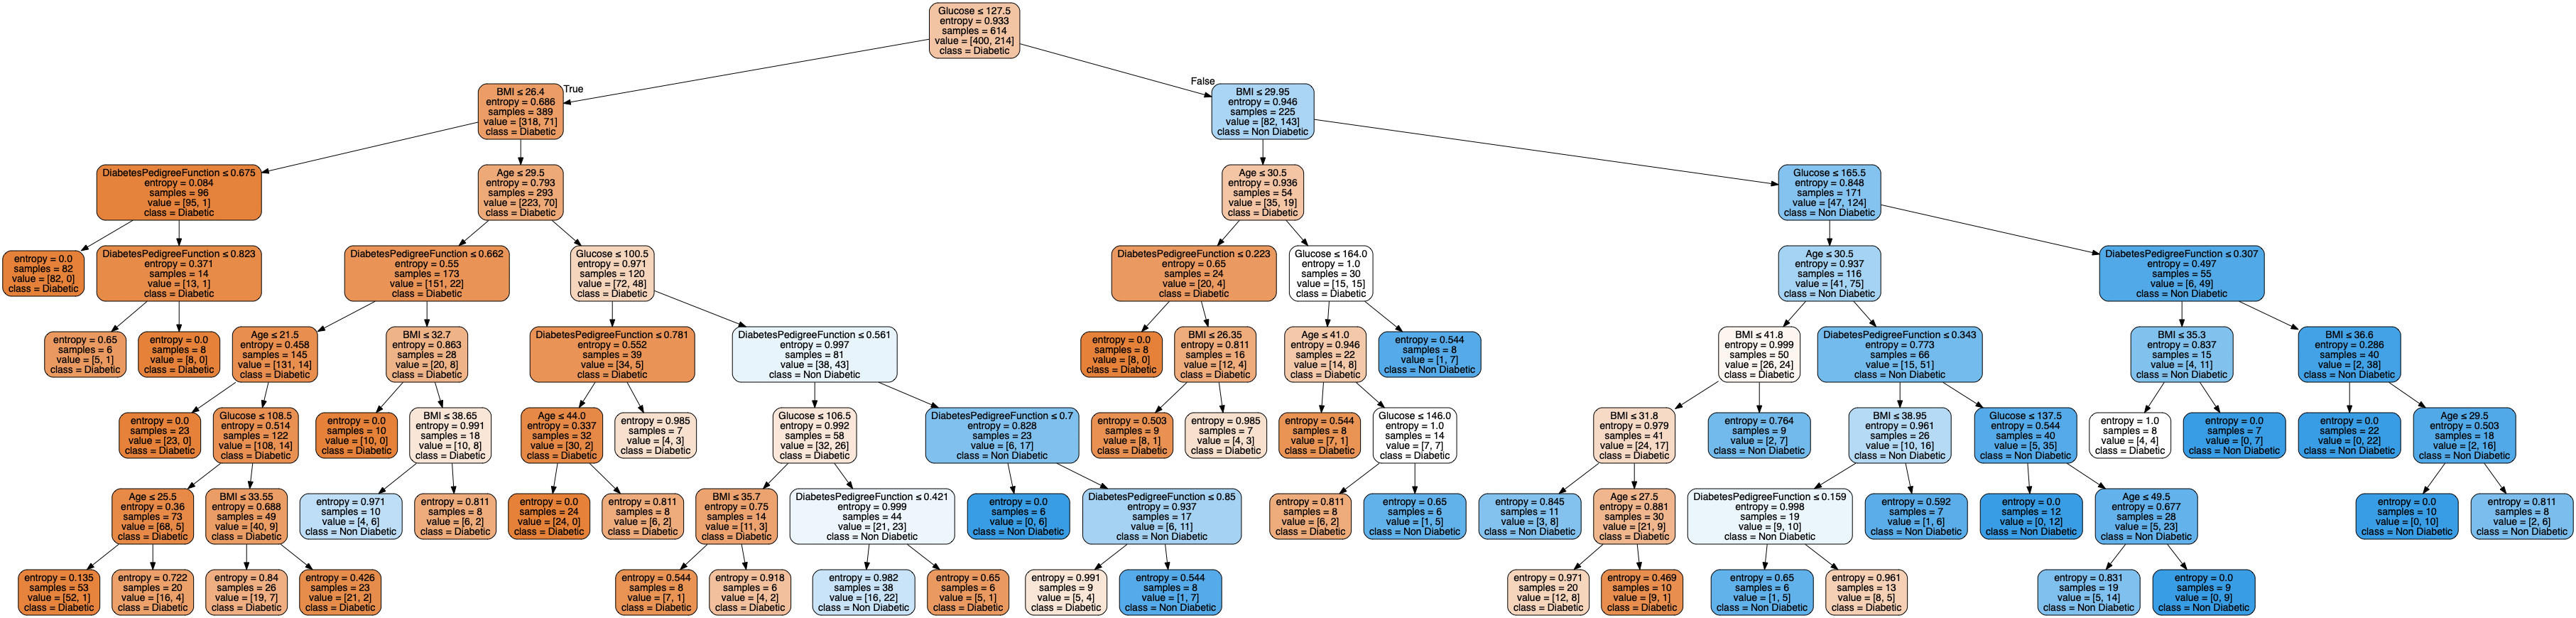

In [59]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(my_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pima_indians_df.columns[[1, 7, 5, 6]],class_names=['Diabetic','Non Diabetic'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

- **Diseñe un clasificador k-nn considerando las 4 características seleccionadas con el método embedded. Incluya las celdas necesarias**

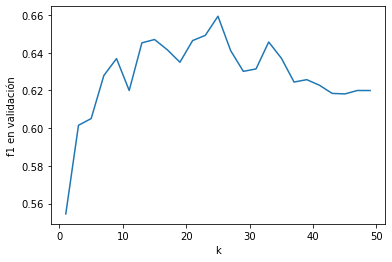

25


In [60]:

X_train_norm_FT = X_train_norm[:,[1, 7, 5, 6]]
X_test_norm_FT = X_test_norm[:,[1, 7, 5, 6]]


k_values = range(1,50,2)


cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_FT, Y_train, cv=3, scoring='f1')

    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('f1 en validación')
plt.show()




# Seleccionamos el máximo valor 
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [61]:
# Diseñamos el clasificador KNN con el máximo valor de SFS
k_selec = 25
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_FT, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_FT)

print('Embebbed. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_FT, Y_test))
print('Embebbed. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('Embebbed. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

Embebbed. Accuracy en test con k= 25: 0.7532467532467533
Embebbed. Sensibilidad en test con k= 25: 0.48148148148148145
Embebbed. Precisión en test con k= 25: 0.7222222222222222


- **Compare y discuta los resultados obtenidos en este apartado, intentando justificar los valores obtenidos. Incluya las celdas necesarias**


In [62]:
Tabla = pd.DataFrame({ "Prestaciones en test":["Accuracy","Sensibilidad","Precisión"],                     #################
                      "Tree - Embebbed" : ["0.76","0.519","0.718"],
                      "KNN - Embebbed" : ["0.753","0.481","0.722"]})
Tabla

,Prestaciones en test,Tree - Embebbed,KNN - Embebbed
0,Accuracy,0.76,0.753
1,Sensibilidad,0.519,0.481
2,Precisión,0.718,0.722


A la vista de los resultados obtenidos en esta tabla, el método de árboles de clasificación es el que mejores resultados obtiene. Esto es debido a que el método Embebbed se ha realizado en base a árboles de clasificación y ha influido en la selección de características. De esta forma, al utilizar las características que han elegido los árboles del método Embebbed, el método KNN ofrece una pequeña disminución de las prestaciones. Sin embargo, cabe destacar como la precisión de KNN es ligeramente superior al obtenido con árboles.  

# 5. Transformación de características. PCA

A modo de ejemplo, aplicaremos en este apartado una transformación lineal de las características originales normalizadas 



Varianza explicada: [0.25509058 0.15810527 0.12411181 0.11039651 0.10649291 0.08692776
 0.0658951  0.04891948]
0.9559394239790422


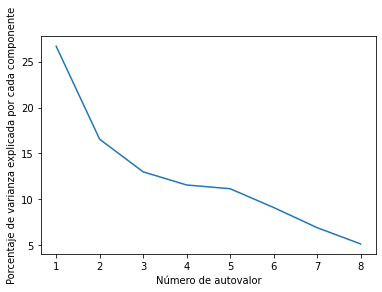

In [63]:
from sklearn.decomposition import PCA

n_componentes_pca= 8
index_autov = range(1,n_componentes_pca+1)
pca = PCA(n_components=n_componentes_pca)
fit = pca.fit(X_train_norm)

print("Varianza explicada: %s" % fit.explained_variance_ratio_)
print(sum(fit.explained_variance_ratio_))

Porc_var_expl = fit.explained_variance_ratio_/sum(fit.explained_variance_ratio_)*100



    
plt.plot(index_autov, Porc_var_expl)
plt.xlabel('Número de autovalor')
plt.ylabel('Porcentaje de varianza explicada por cada componente')
plt.show()



(614, 2)
(614, 9)
(154, 2)
(154, 9)


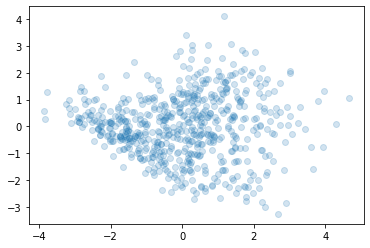

In [64]:
# Nos quedamos con las dos primeras componentes principales 

pca = PCA(n_components=2)
X_train_norm_pca = pca.fit_transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

print(X_train_norm_pca.shape)
print(X_train_norm.shape)

print(X_test_norm_pca.shape)
print(X_test_norm.shape)



plt.scatter(X_train_norm_pca[:,0],X_train_norm_pca[:,1],alpha=0.2)


# Entrega 

- **Represente el scatter plot de las observaciones proyectadas sobre las dos primeras componentes principales, identificando con un símbolo o con un color distinto las observaciones asociadas a cada clase. Realice esta representación tanto para las observaciones de entrenamiento y para las de test.**



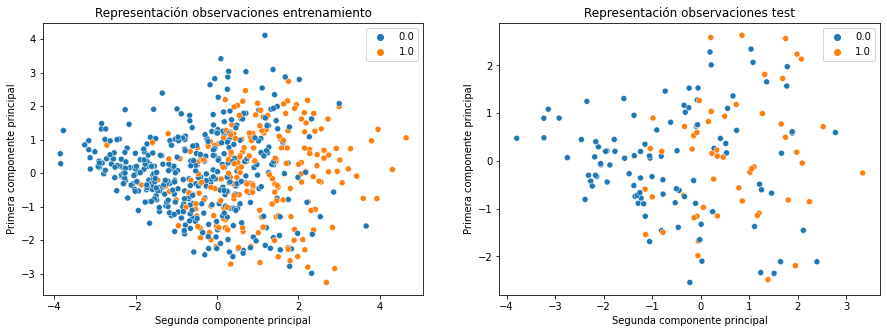

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Representación observaciones entrenamiento")
sns.scatterplot(x = X_train_norm_pca[:,0],y = X_train_norm_pca[:,1], hue=Y_train);
plt.xlabel("Segunda componente principal")
plt.ylabel("Primera componente principal")


plt.subplot(122)
plt.title("Representación observaciones test")
sns.scatterplot(x = X_test_norm_pca[:,0],y = X_test_norm_pca[:,1], hue=Y_test);
plt.xlabel("Segunda componente principal")
plt.ylabel("Primera componente principal")
plt.show()

A partir del scatter plot se puede observar como las clases están muy dispersas y no existe una clara diferenciación de éstas entre las 2 primeras componentes obtenidas mediante PCA.

- **Diseñe un clasificador basado en k-nn considerando las nuevas 2 características, y evalúe sus prestaciones sobre el conjunto de test.**


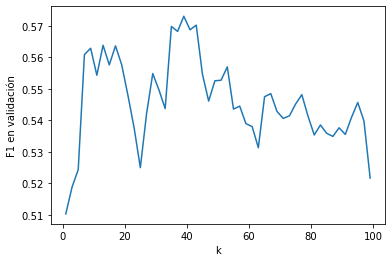

39


In [66]:
k_values = range(1,101,2)

cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm_pca, Y_train, cv=3, scoring='f1')

    cv_k_scores.append(scores.mean())

plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('F1 en validación')
plt.show()




# Seleccionamos el máximo valor 
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [67]:
# Diseñamos el clasificador KNN 
k_selec = 39
knn = KNeighborsClassifier(n_neighbors = k_selec)

# Entrenamos el modelo
knn.fit(X_train_norm_pca, Y_train)

## Predecimos usando X_test
y_pred=knn.predict(X_test_norm_pca)

print('PCA. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_norm_pca, Y_test))
print('PCA. Sensibilidad en test con k= '+ str(k_selec) + ':', recall_score(Y_test, y_pred))
print('PCA. Precisión en test con k= '+ str(k_selec) + ':', precision_score(Y_test, y_pred))

PCA. Accuracy en test con k= 39: 0.6818181818181818
PCA. Sensibilidad en test con k= 39: 0.4444444444444444
PCA. Precisión en test con k= 39: 0.5581395348837209


- **Compare los resultados numéricos obtenidos con todos los esquemas que ha utilizado en esta práctica para diseñar clasificadores k-nn con 2 características (sólo con esos). Justifique los resultados y extraiga conclusiones.**



In [68]:
Tabla = pd.DataFrame({ "Prestaciones":["Accuracy","Sensibilidad","Precisión"],                        #####################
                      "kNN con chi2 2D" : ["0.721","0.5","0.628"],
                      "kNN con información mutua 2D" : ["0.753","0.5","0.711"],
                      "KNN PCA":["0.682","0.444","0.558"]})
Tabla

,Prestaciones,kNN con chi2 2D,kNN con información mutua 2D,KNN PCA
0,Accuracy,0.721,0.753,0.682
1,Sensibilidad,0.5,0.5,0.444
2,Precisión,0.628,0.711,0.558


Se van a comparar los resultados obtenidos con una selección de características y una transformación de éstas. 

Teniendo en cuenta que en PCA solo se utilizan las 2 primeras componentes principales (mayor variabilidad), se va a comparar con la selección de características con métodos filter en los que también se eligen las 2 variables que más relación tienen con la salida, según los criterios de información mutua y el estadístico chi2.

Se observa que el KNN con información mutua es el que mejores prestaciones obtiene en el conjunto de test. En segundo lugar, KNN con chi2 y en último lugar KNN con PCA. Esto puede ser debido a que PCA se queda con las dos primeras componentes principales, teniendo en cuenta la variabilidad. Esta selección puede estar descartando información, que en sentido de variabilidad aportan menos información, pero que en realidad es información importante en otros aspectos para predecir la variable de salida. 

A través de la extracción de características por medio de PCA se obtienen las peores prestaciones. Por lo tanto, la reducción de la dimensionalidad se realiza mejor con los métodos de selección de características que con las transformación en este caso. 